# MNIST

## import libraries

In [1]:
import os
import json

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms.v2 as v2

from torchvision import datasets, transforms
from PIL import Image

## Dataset

In [2]:
transforms = v2.ToPILImage()

dataset

In [3]:
MNIST_train = torchvision.datasets.MNIST('./data/mnist', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./data/mnist', download=True, train=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.04MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.53MB/s]


folders

In [4]:
if not os.path.exists('./dataset'):
  os.mkdir('./dataset')

  for info in ('train', 'test'):
    os.mkdir(os.path.join('./dataset', info))
    for i in range(10):
      os.mkdir(os.path.join('./dataset', info, f'class_{i}'))

In [5]:
for info in (('train', MNIST_train), ('test', MNIST_test)):
  for i in range(10):
    path = os.path.join('./dataset', info[0], f'class_{i}')
    cls = info[1].data[info[1].targets == i]
    for n, x in enumerate(cls):
      x = transforms(x)
      x.save(os.path.join(path, f'img_{n}.png'), 'png')

json file

In [6]:
targets = dict()
for i in range(10):
  targets[f'class_{i}'] = i

fp = open('/content/dataset/format.json', 'w')
json.dump(targets, fp)
fp.close()

## class Dataset

In [7]:
class DigitDataset(data.Dataset):
  def __init__(self, path, train=True, transform=None):
    self.path = os.path.join(path, 'train' if train else 'test')
    self.transform = transform

    with open(os.path.join(path, 'format.json'), 'r') as f:
      self.format = json.load(f)

    self.length = 0
    self.files = []
    self.targets = torch.eye(10)

    for _dir, _target in self.format.items():
      path = os.path.join(self.path, _dir)
      list_files = os.listdir(path)
      self.length += len(list_files)
      self.files.extend(map(lambda _x: (os.path.join(path, _x), _target), list_files))

  def __getitem__(self, item):
    path_file, target = self.files[item]
    t = self.targets[target]
    img = Image.open(path_file)

    if self.transform:
      img = self.transform(img).ravel().float() / 255.

    return img, t

  def __len__(self):
    return self.length

In [8]:
transform = v2.ToImage()

In [9]:
d_train = DigitDataset('dataset')
d_test = DigitDataset('dataset', train=False)

### test without transform

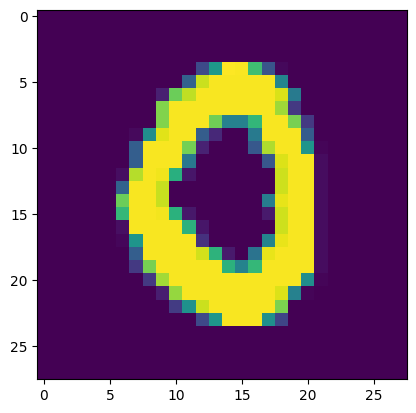

In [10]:
import matplotlib.pyplot as plt

img, t = d_train[0]
plt.imshow(img)

In [11]:
to_tensor = v2.ToImage()
t = to_tensor(img)
t

Image([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  57, 136,
         255, 254, 177,  67,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 235, 253,
         253, 253, 253, 253, 116,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [12]:
t.shape

torch.Size([1, 28, 28])

In [13]:
t = to_tensor(img).ravel().float() / 255

In [14]:
t

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
len(d_train), len(d_test)

(60000, 10000)

### test with transform

In [16]:
d_train = DigitDataset('dataset', transform=transform)
d_test = DigitDataset('dataset', train=False, transform=transform)

In [17]:
t = iter(d_train)

In [18]:
x, y = next(t)

In [19]:
x.size()

torch.Size([784])

In [20]:
x, y

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

## Dataloader

In [21]:
batch_size = 100

train_loader = data.DataLoader(d_train, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(d_test, batch_size=batch_size, shuffle=False)

In [22]:
len(train_loader), len(d_train)

(600, 60000)

## Class NN

In [23]:
class NN_mnist(nn.Module):
  def __init__(self, input_dim, num_hidden, output_dim):
    super().__init__()
    self.layer1 = nn.Linear(input_dim, num_hidden)
    self.layer2 = nn.Linear(num_hidden, output_dim)

  def forward(self, x):
    x = self.layer1(x)
    x = nn.functional.relu(x)
    x = self.layer2(x)

    return x

In [24]:
model = NN_mnist(28*28, 32, 10)

## Train

In [25]:
optimizer = optim.Adam(params=model.parameters(), lr=0.01)
loss_f = nn.CrossEntropyLoss()

epochs= 5

In [26]:
model.train()

for _ in range(epochs):
  for x_train, y_train in train_loader:
    output = model(x_train)
    loss = loss_f(output, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## Test

In [27]:
model.eval()
Q=0

for x_train, y_train in test_loader:
  with torch.no_grad():
    output = model(x_train)

    output = torch.argmax(output, dim=1)
    y = torch.argmax(y_train, dim=1)

    Q += torch.sum(output==y).item()

print(Q / len(d_test))

0.961
